# Concentration gradient and velocity

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from corr_utils import *

In [3]:
folder = r'D:\density_fluctuations\08032020\concgrad_velocity\01'
corr = np.load(os.path.join(folder, 'corr_evolution.npy'))

-0.004129624573631827
-0.011827682924355052
-0.002771167655406734


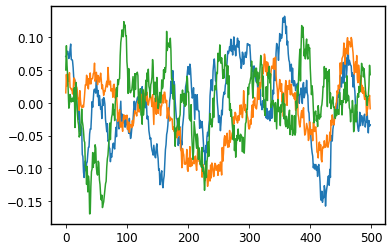

In [12]:
for n in [2, 5, 8]:
    folder = r'D:\density_fluctuations\08032020\concgrad_velocity\{:02d}'.format(n)
    corr = np.load(os.path.join(folder, 'corr_evolution.npy'))
    t = np.array(range(0, len(corr)))
    plt.plot(corr[t>1300])
    print(corr[t>1300].mean())

In [61]:
folder = r'D:\density_fluctuations\08032020\concgrad_velocity\07'
corr_field = np.load(os.path.join(folder, 'corr_whole.npy'))
stack = np.load(r'D:\density_fluctuations\08032020\small_imseq\07\stack.npy')

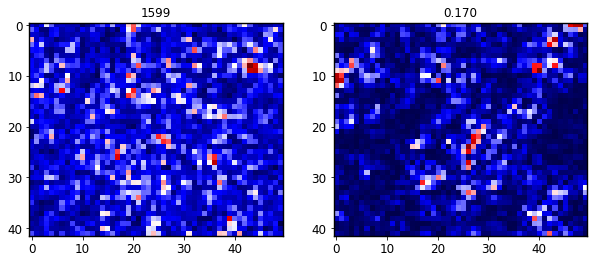

In [63]:
for n in range(1300, 1600):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    im1 = stack[2*n-5:2*n+5].std(axis=0)
    ax[0].imshow(im1, cmap='seismic')
    ax[0].set_title(str(n))
    ax[1].imshow(abs(corr_field[n]), cmap='seismic')
    ax[1].set_title('{:.3f}'.format(corr2d(im1, abs(corr_field[n]))))
    plt.pause(0.01)
    clear_output(wait=True)

In [64]:
folder = r'D:\density_fluctuations\08032020\concgrad_velocity\01'
corr_field = np.load(os.path.join(folder, 'corr_whole.npy'))
stack = np.load(r'D:\density_fluctuations\08032020\small_imseq\01\stack.npy')

corr_mag: 0.2029916806004967
corr: -0.09632006286704925


Text(0.5, 1.0, 'adv')

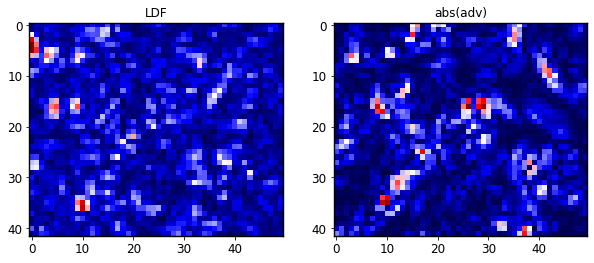

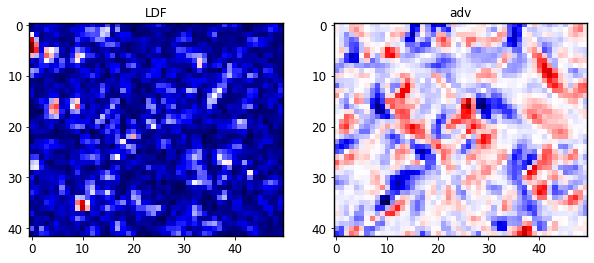

In [74]:
n = 1600 # frame 3000
ldf = stack[2*n:2*n+10].std(axis=0)
adv_mag = abs(corr_field[n])
adv = corr_field[n]
corr_mag = corr2d(ldf, adv_mag)
corr = corr2d(ldf, adv)
print('corr_mag: ' + str(corr_mag))
print('corr: ' + str(corr))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(ldf, cmap='seismic')
ax[0].set_title('LDF')
ax[1].imshow(adv_mag, cmap='seismic')
ax[1].set_title('abs(adv)')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(ldf, cmap='seismic')
ax[0].set_title('LDF')
ax[1].imshow(adv, cmap='seismic')
ax[1].set_title('adv')


In [70]:
n = 1600 # frame 3000
df = stack[2*n] - stack[2*n+10]
adv_mag = abs(corr_field[n])
adv = corr_field[n]
corr_mag = corr2d(df, adv_mag)
corr = corr2d(df, adv)
print('corr_mag: ' + str(corr_mag))
print('corr: ' + str(corr))

corr_mag: 0.04657347863946478
corr: 0.028567824272082088


In [89]:
c_list = []
for n in range(2500, 3500, 20):
    piv_folder = r'D:\density_fluctuations\08032020\piv_imseq\01'
    pivData = pd.read_csv(os.path.join(piv_folder, '{0:04d}-{1:04d}.csv'.format(n, n+1)))
    x = pivData.x.drop_duplicates()
    col = len(x)
    y = pivData.y.drop_duplicates()
    row = len(y)
    U = np.reshape(np.array(pivData.u), (row, col))
    V = np.reshape(np.array(pivData.v), (row, col))
    v_mag = U**2 + V**2
    v_mag = v_mag ** 0.5
    corr = corr2d(v_mag, stack[n])
    c_list.append(corr)
    print(corr)

0.06926262099532682
0.12288194602061495
0.10221643075223624
0.07042013830571062
0.06874911480857566
0.06186296883821466
-0.012448174203107242
-0.10292587485940075
0.035018382436665274
0.1745512945099208
0.04875514588519012
0.013764902508029397
-0.02131947297392958
0.1141348865323712
0.20737955945688613
0.17128048122073108
0.10725941131726408
0.10722497049393041
0.049075547148143966
-0.007899270279489525
0.10097770620088654
0.05062411873824225
0.028950710021956923
-0.016378485560848467
0.03538074168903528
0.06457004782766787
0.048467044942668576
-0.0008708725579528423
0.022217511852239347
0.0057892869806794815
0.1009999580800332
0.1143686524405636
0.10645943162299404
0.05794885977650099
0.055278382765032996
0.11650908825568235
0.09522933050078825
0.03225110183595275
-0.02903208890603257
0.052879445276119444
0.08374786710772948
0.0625630372626143
-0.02098617567780077
0.1301131674838572
-0.013736693229971427
-0.08572670220823106
-0.047776592071597616
0.08145001145198104
0.0769043239381873

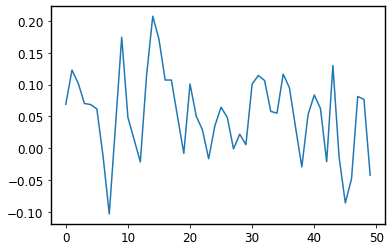

In [90]:
plt.plot(c_list)

In [91]:
np.array(c_list).mean()

0.05292656153374083